In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

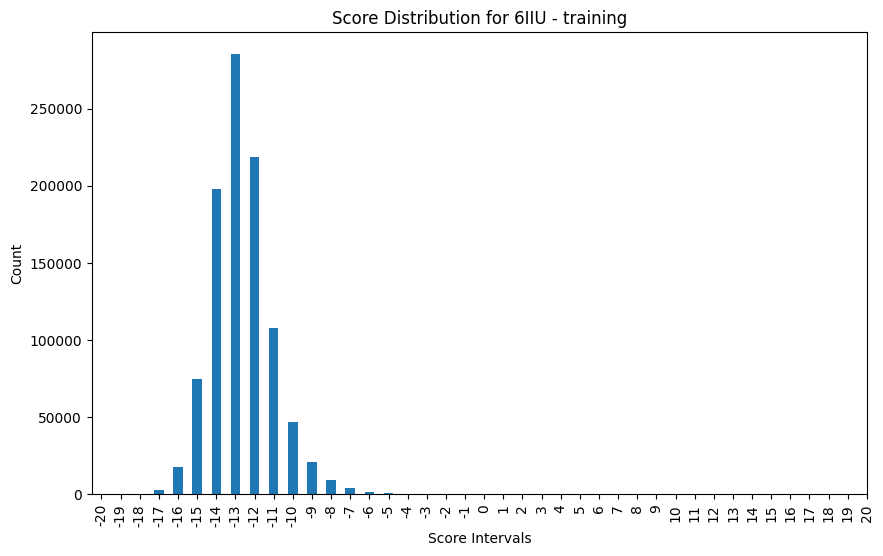

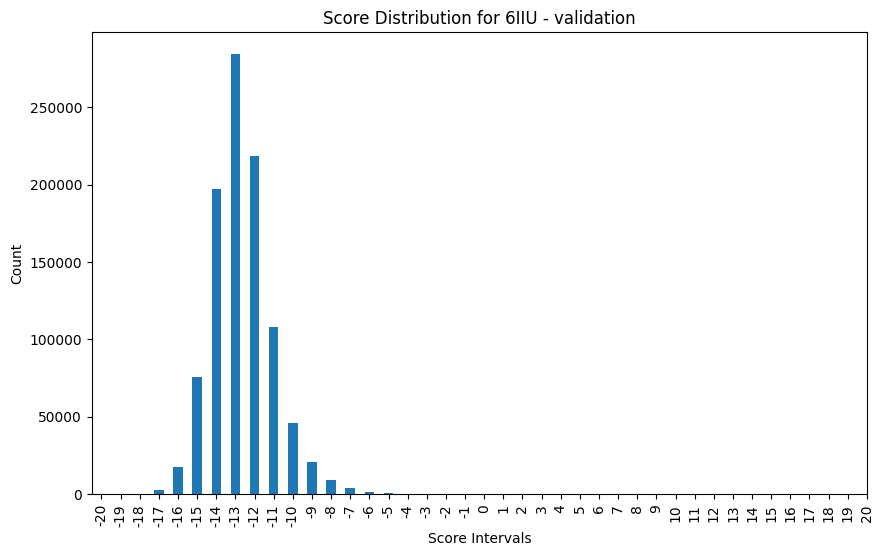

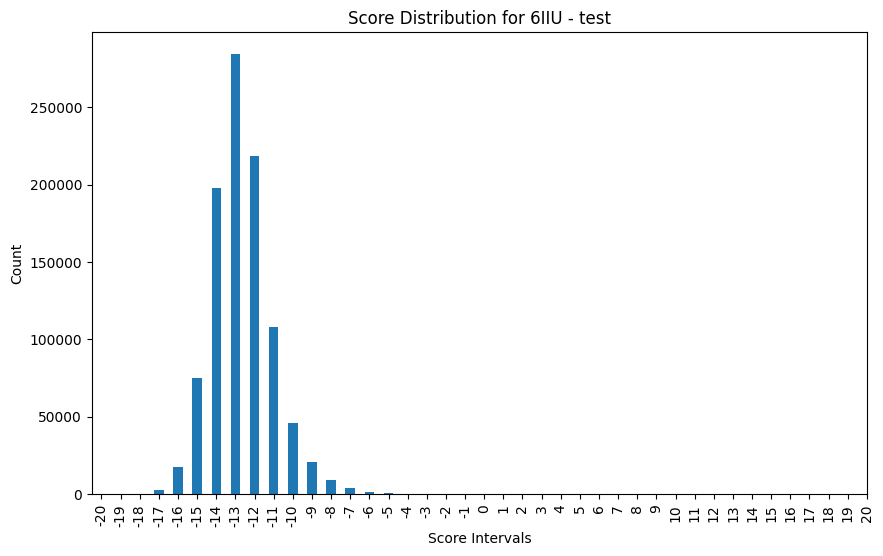

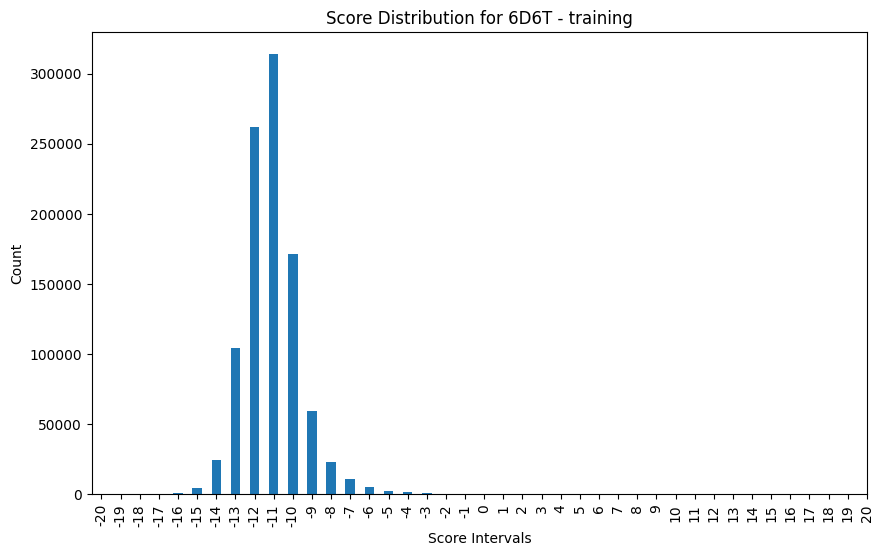

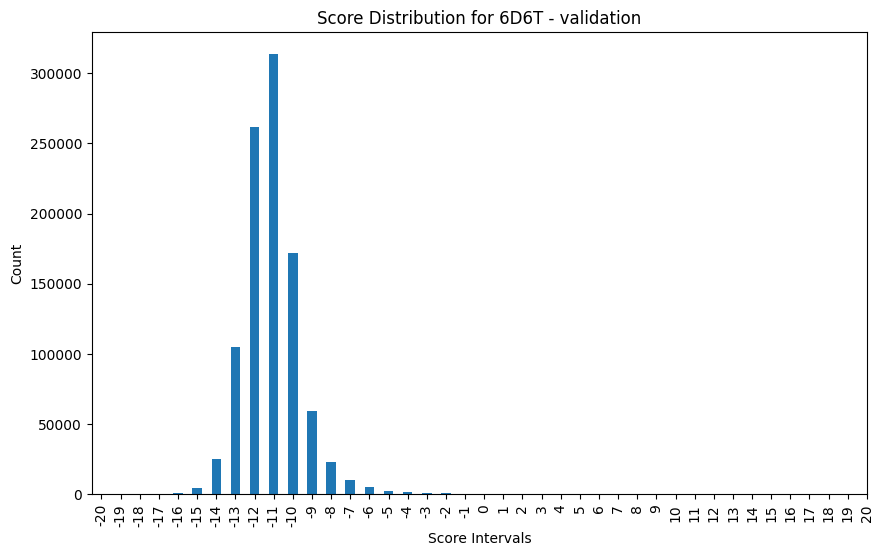

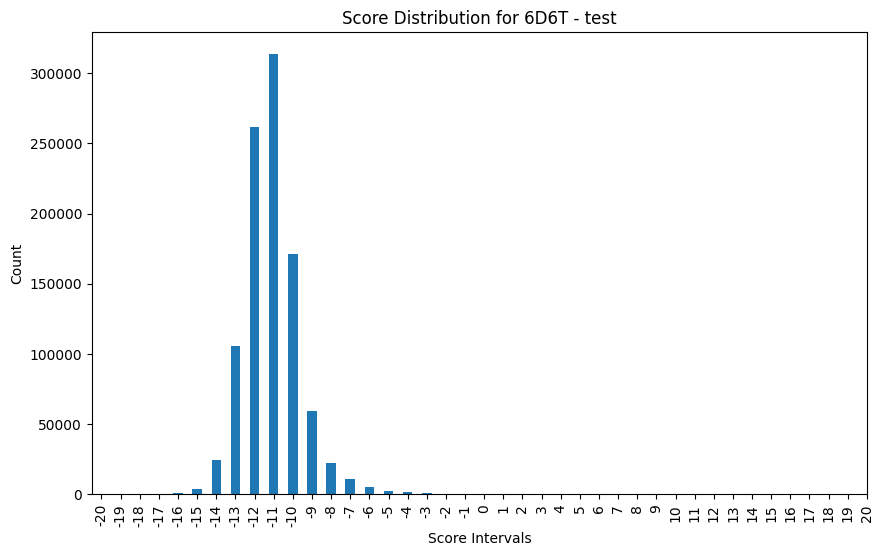

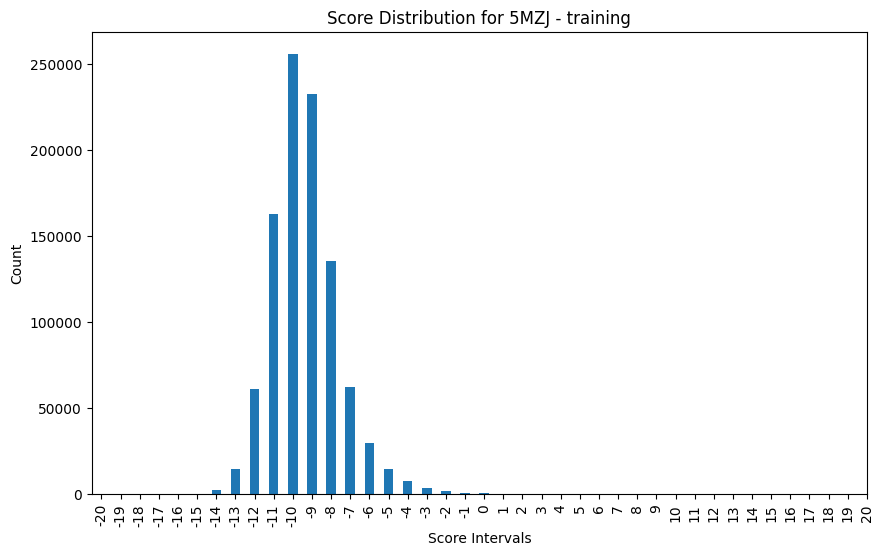

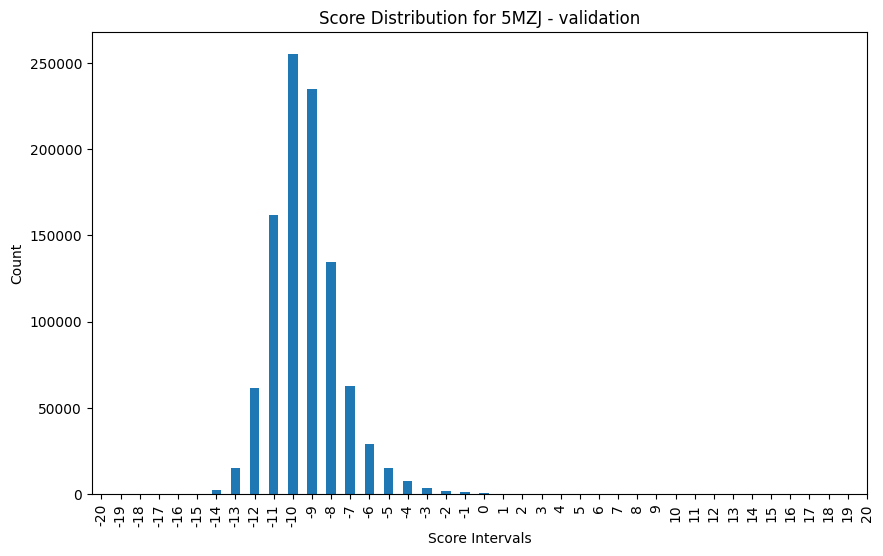

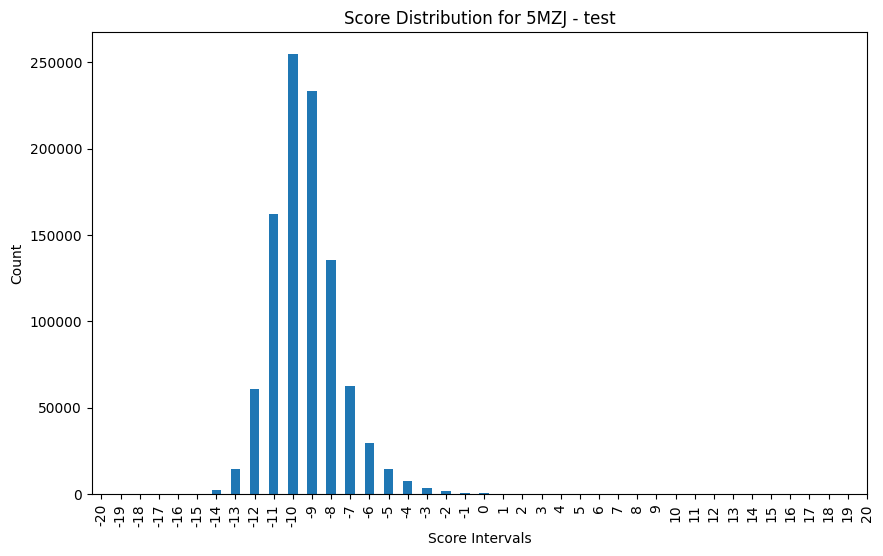

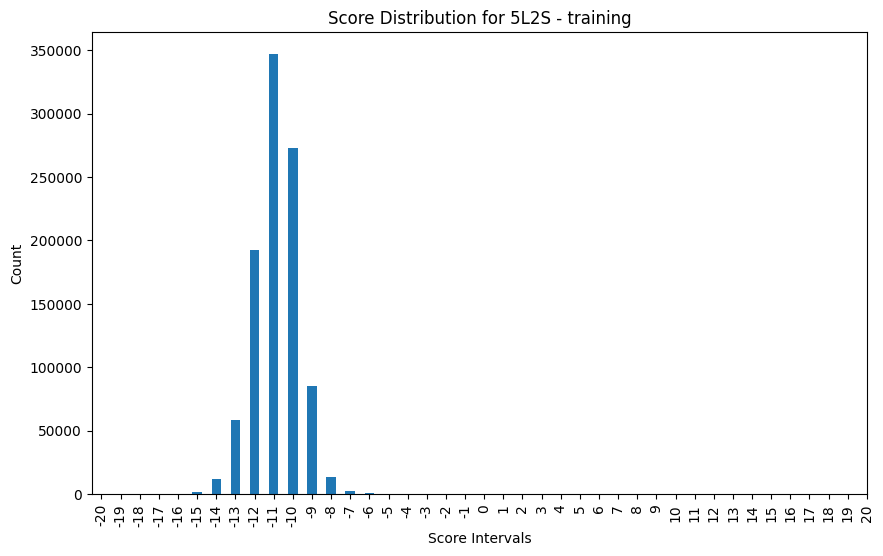

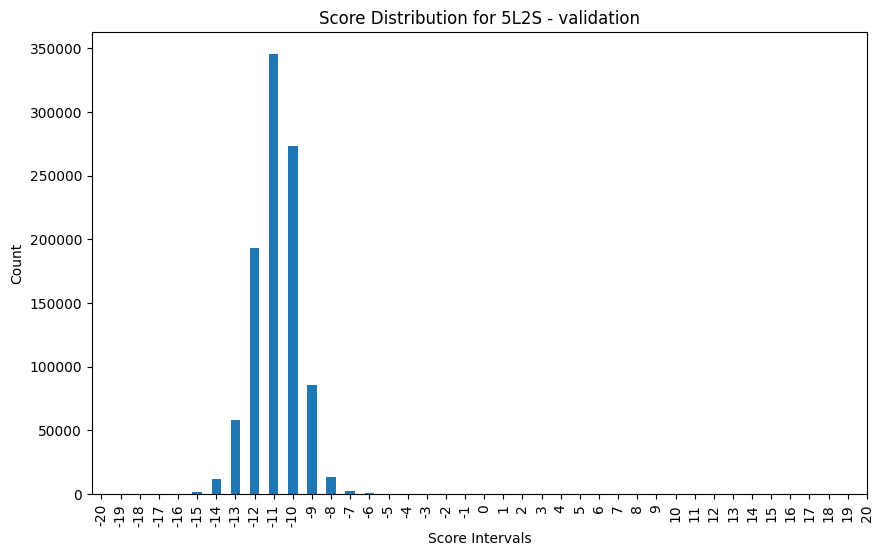

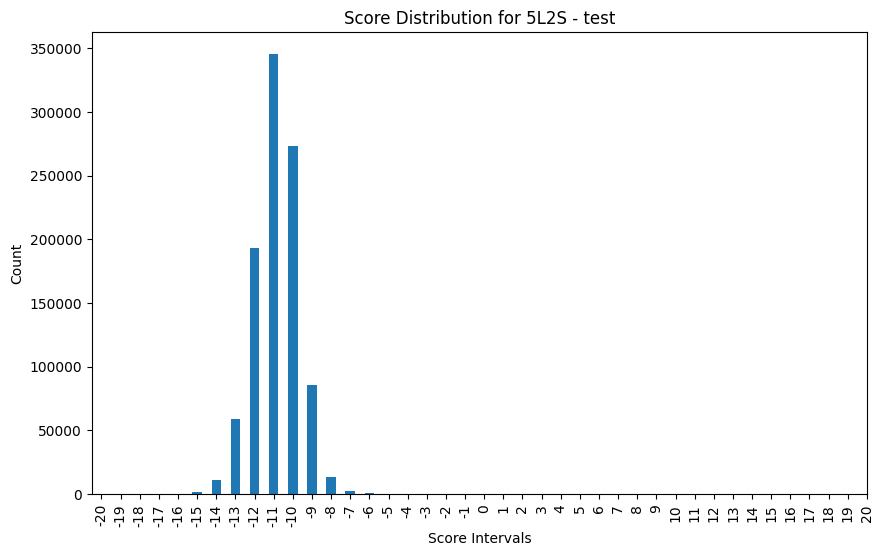

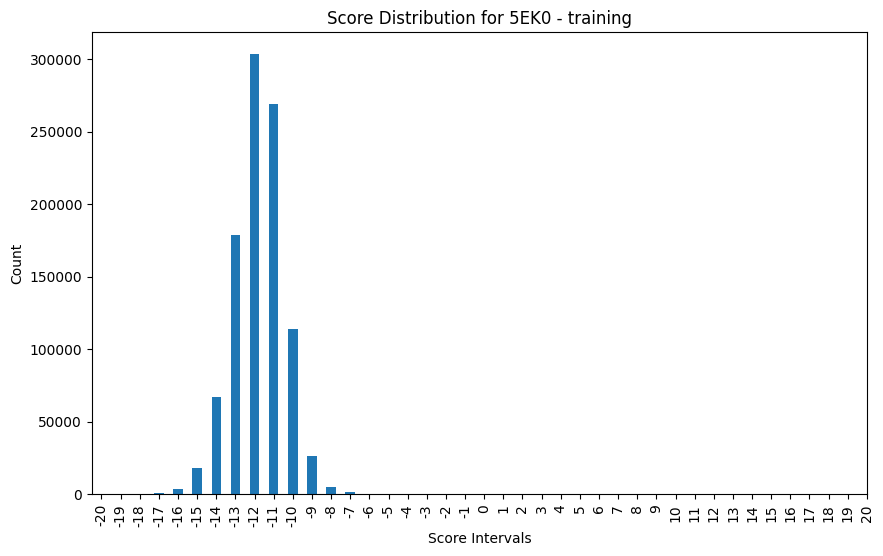

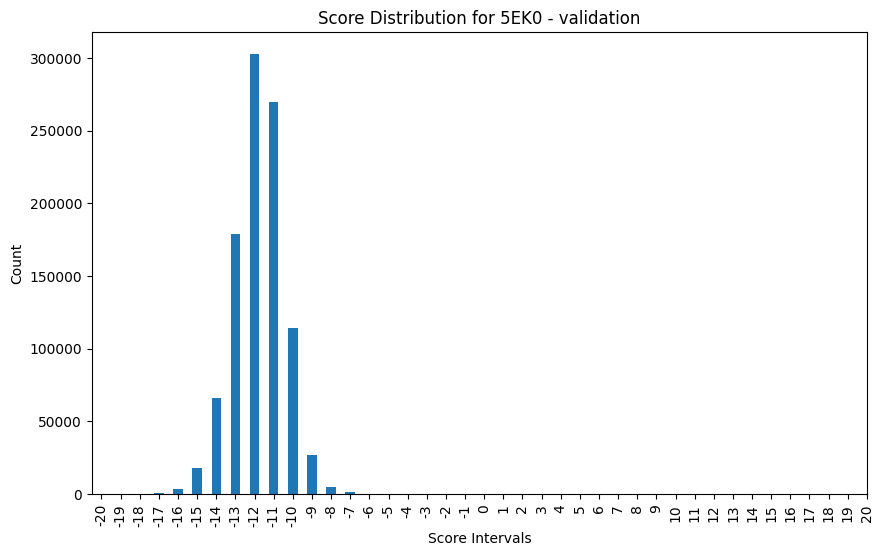

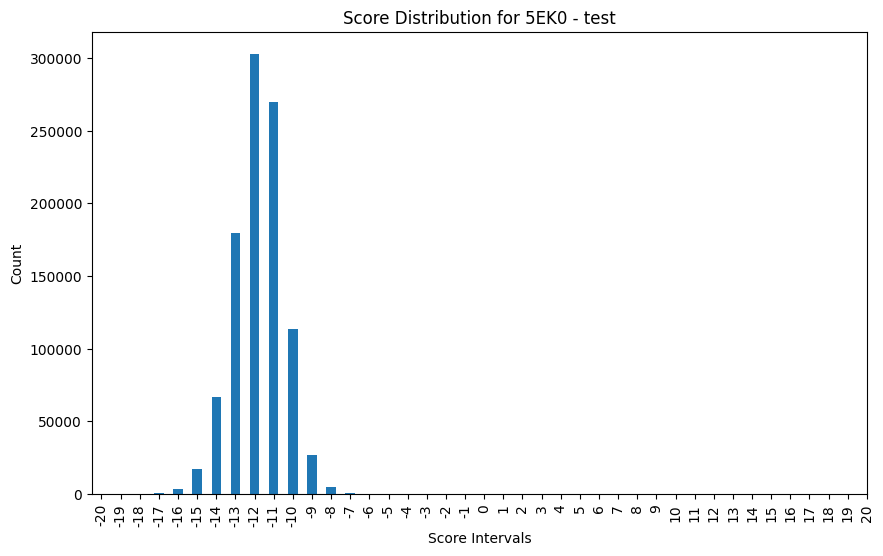

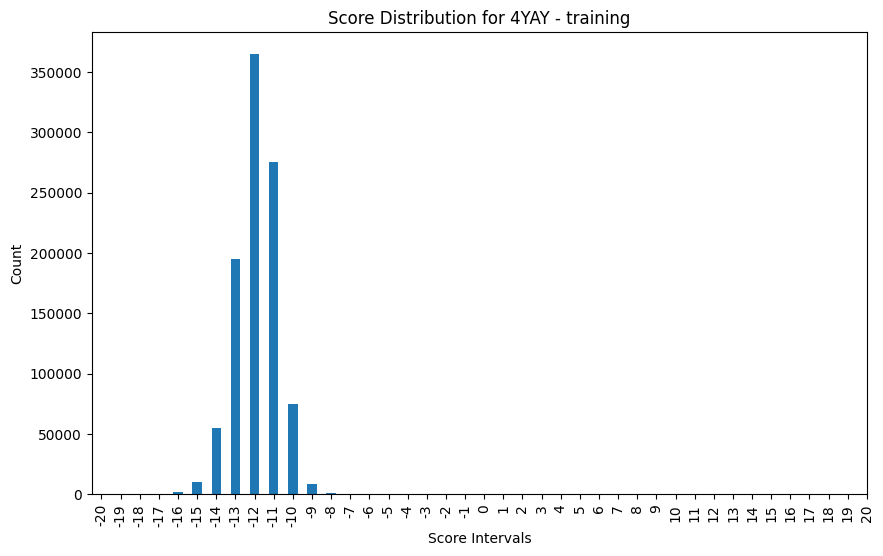

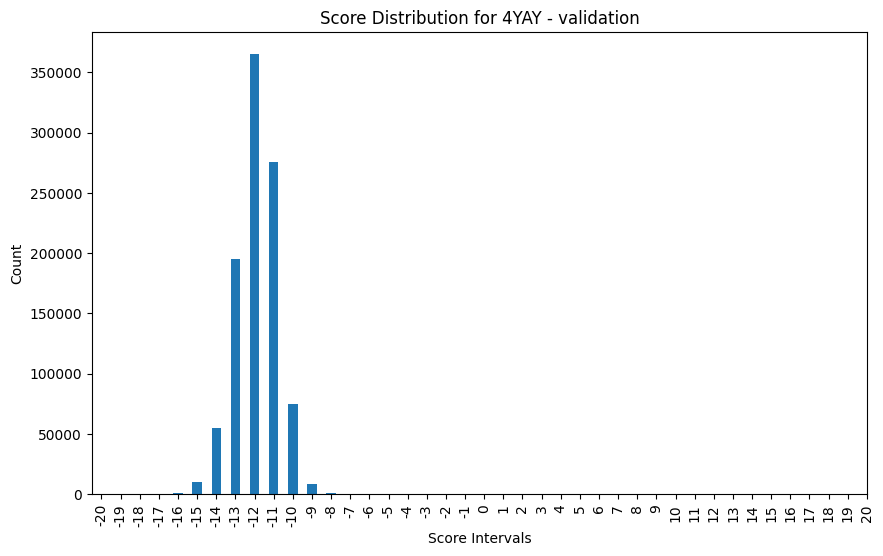

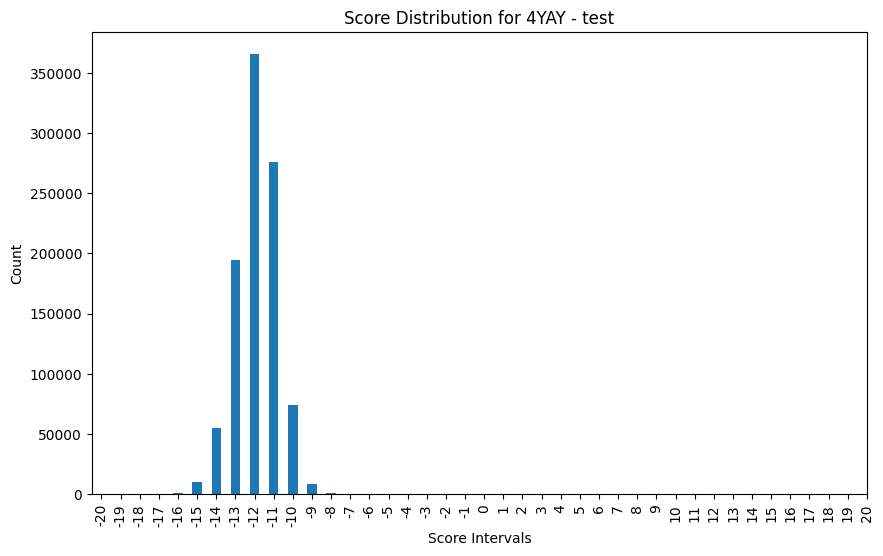

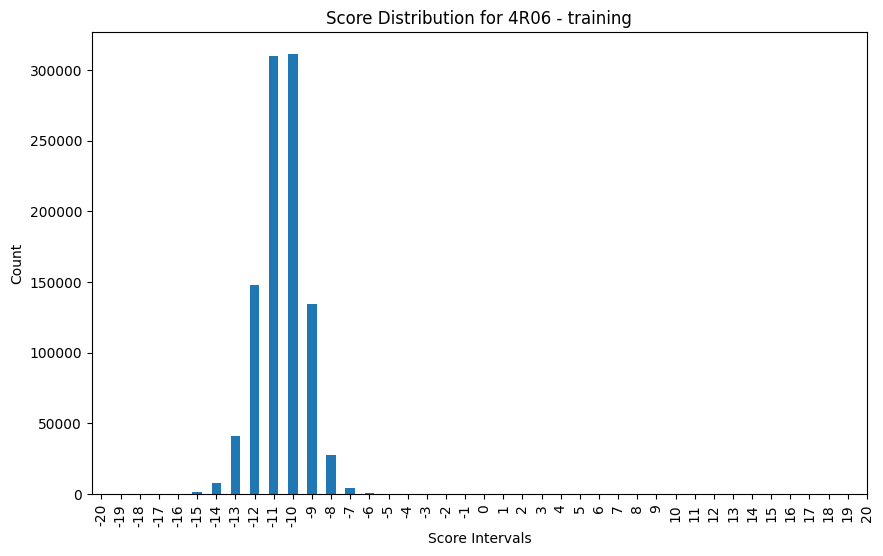

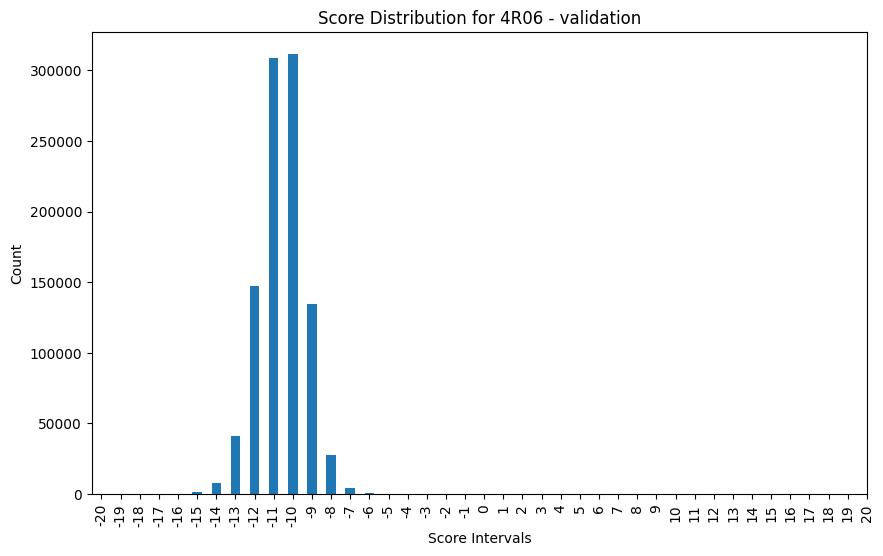

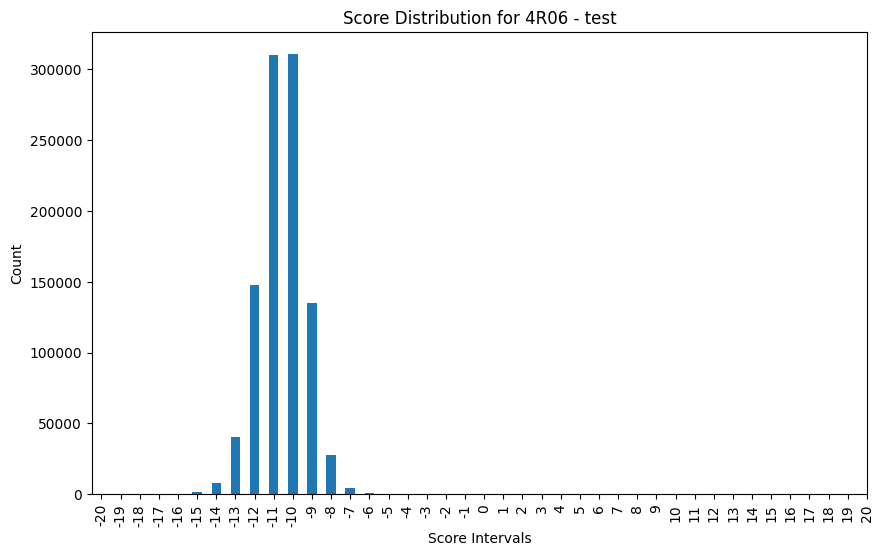

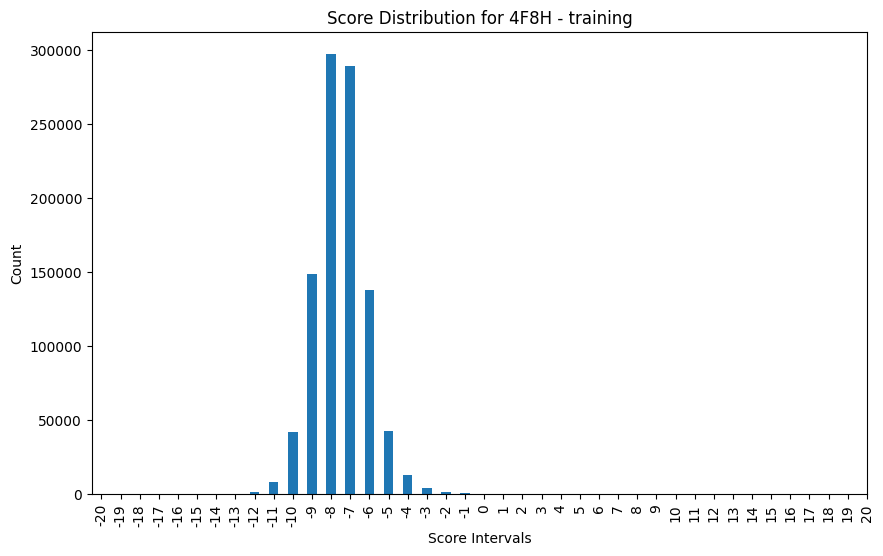

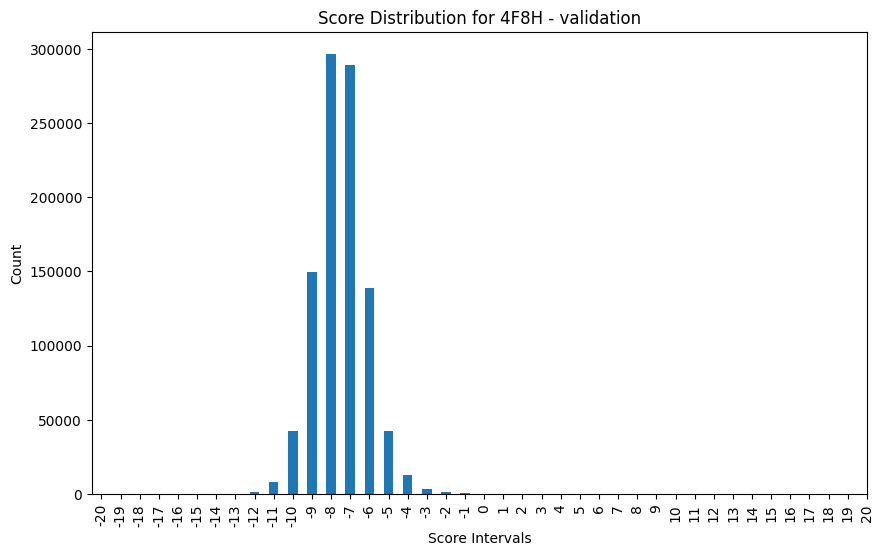

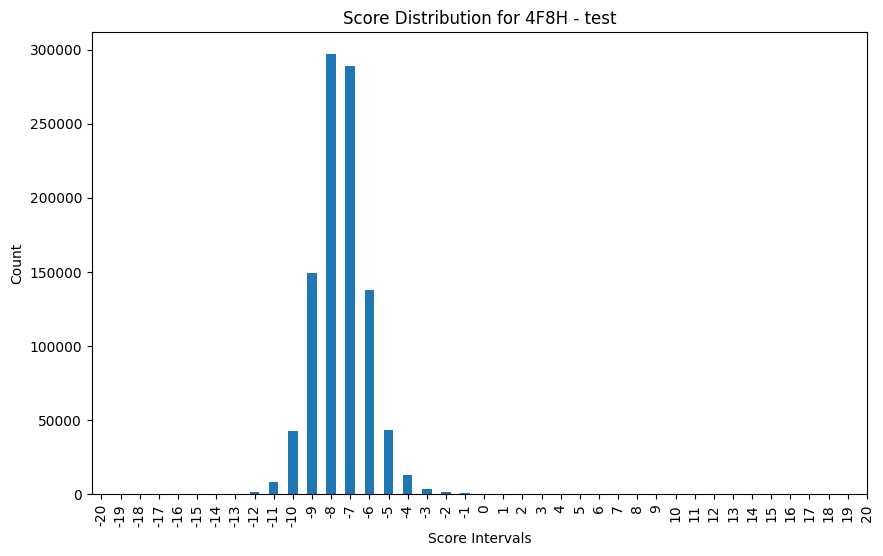

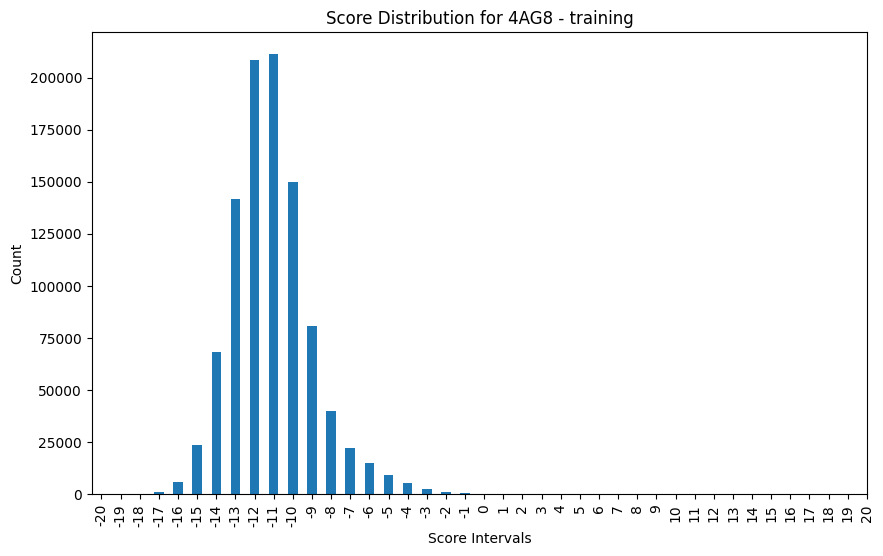

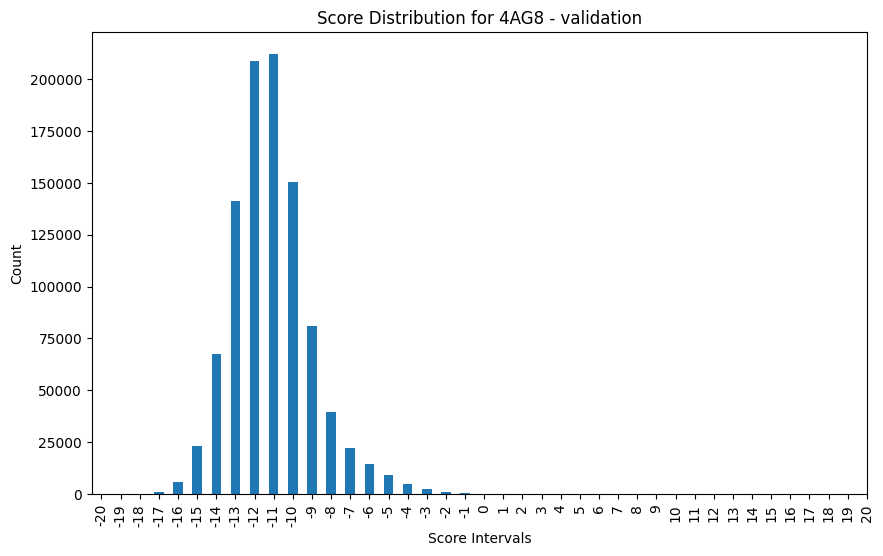

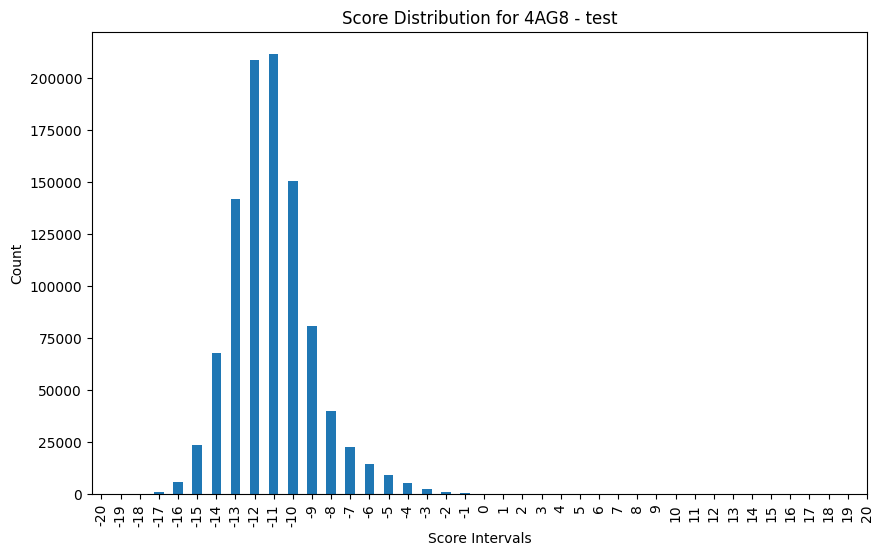

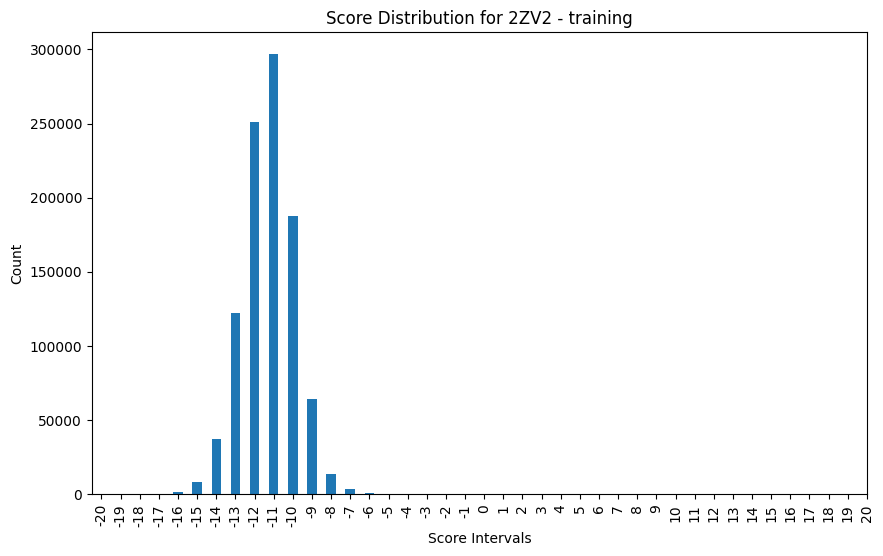

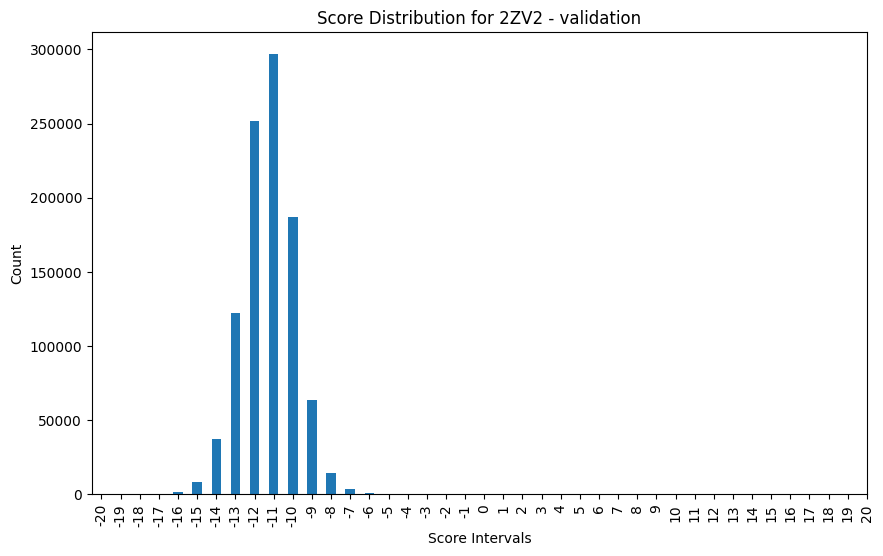

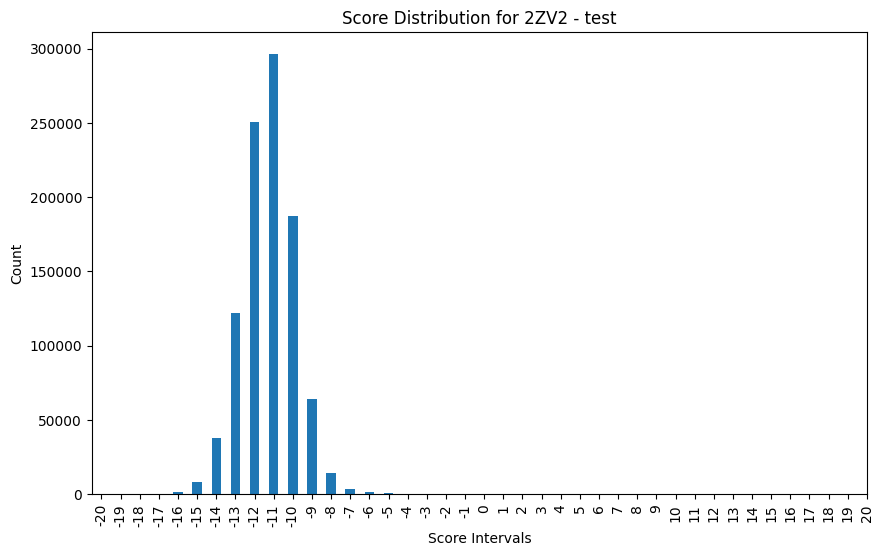

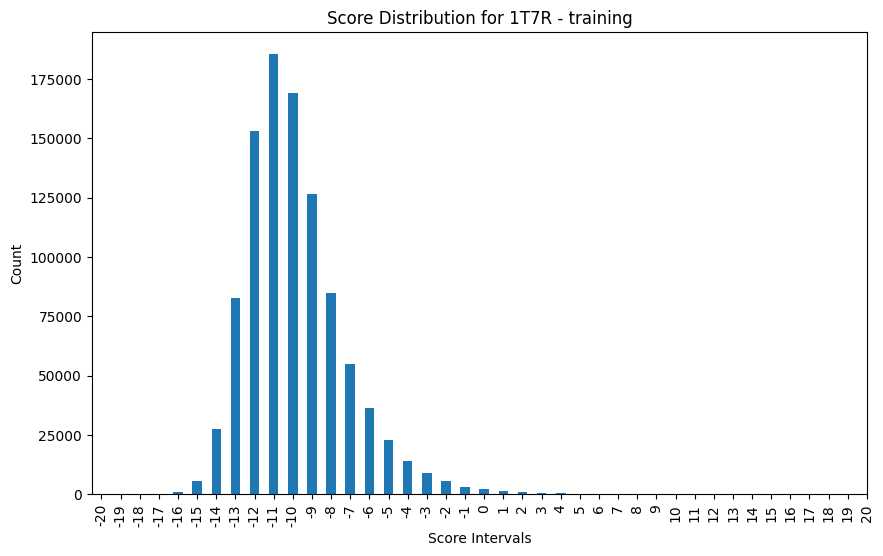

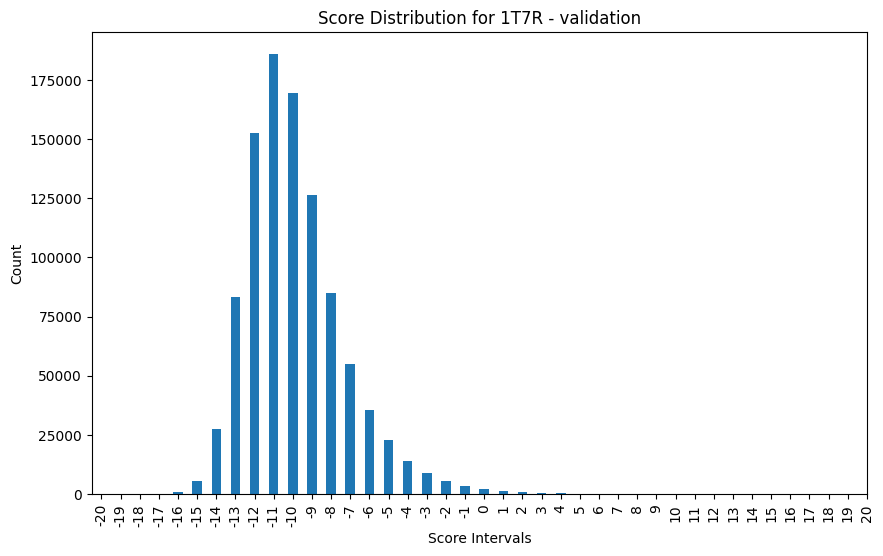

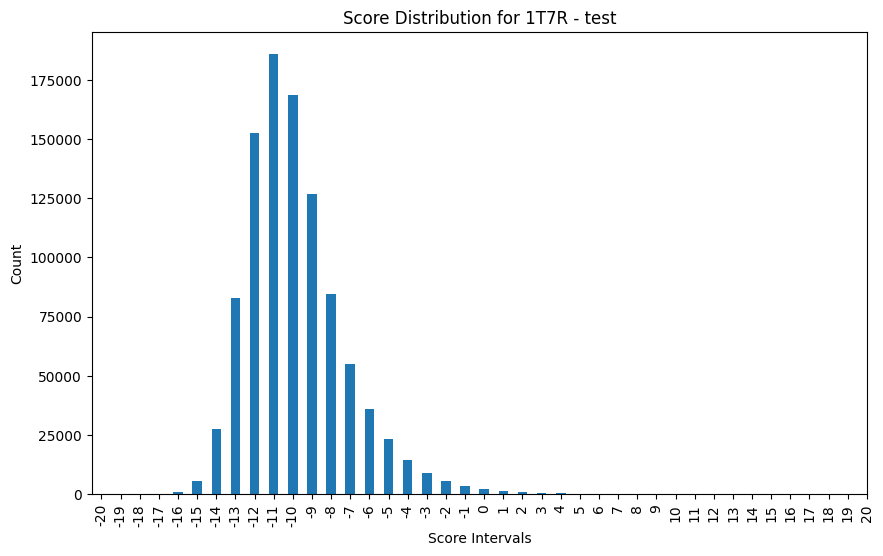

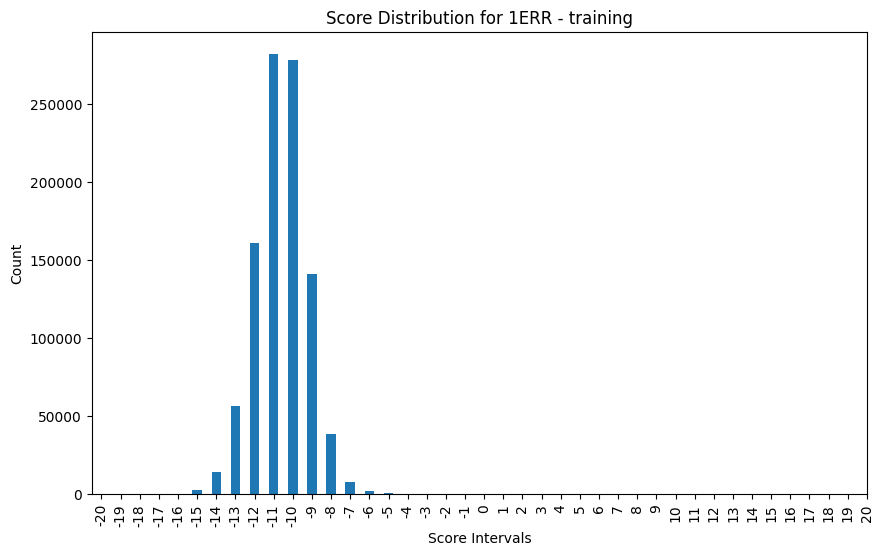

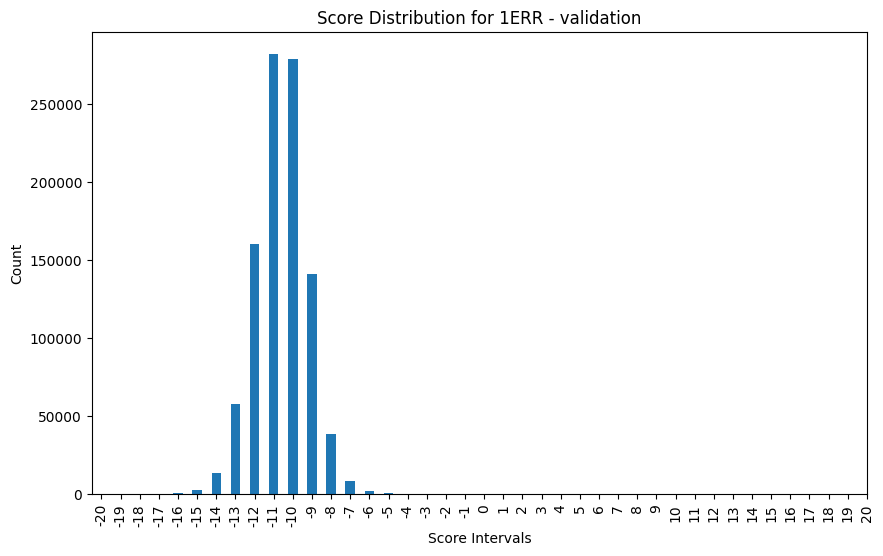

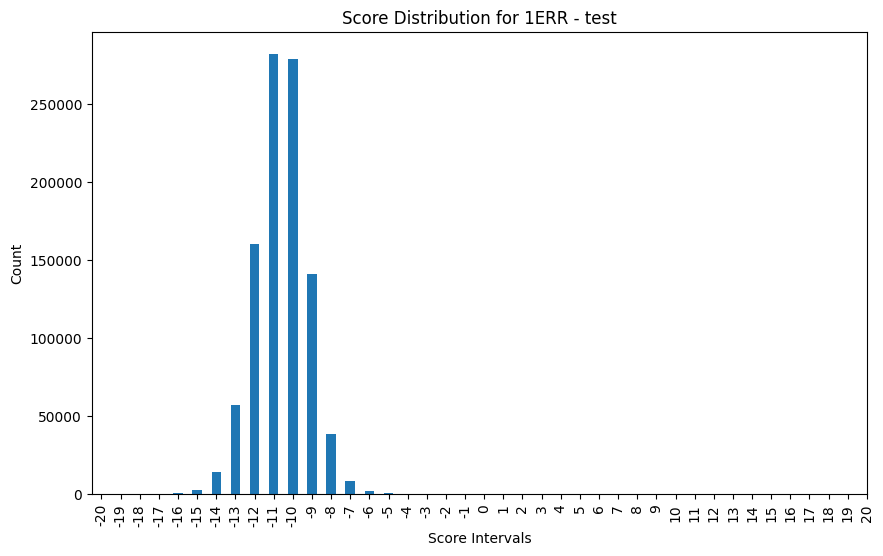

In [ ]:
dataset_path = '/content/drive/MyDrive/Dataset'
main_folders = [folder for folder in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, folder))]

x_axis_limits = (-20, 20)
step_size = 1
x_ticks = np.arange(x_axis_limits[0], x_axis_limits[1] + step_size, step_size)

for main_folder in main_folders:
    main_folder_path = os.path.join(dataset_path, main_folder)

    dfs = {'training': None, 'validation': None, 'test': None}

    for subset in ['training', 'validation', 'test']:
        file_path = os.path.join(main_folder_path, f'{subset}.csv')

        if os.path.exists(file_path):
            df = pd.read_csv(file_path)
            dfs[subset] = df
            bins = np.arange(x_axis_limits[0], x_axis_limits[1] + step_size, step_size)
            df['score_interval'] = pd.cut(df['r_i_docking_score'], bins, include_lowest=True)

            score_counts = df['score_interval'].value_counts().sort_index()

            plt.figure(figsize=(10, 6))
            score_counts.plot(kind='bar')
            plt.title(f"Score Distribution for {main_folder} - {subset}")
            plt.xlabel("Score Intervals")
            plt.ylabel("Count")

            plt.xticks(range(len(x_ticks)), x_ticks)

            plt.show()

        else:
            print(f"File not found: {file_path}")


In [ ]:
def select_molecules_with_threshold(main_directory, n, x_axis_limits=(-20, 20), step_size=1):
    selected_molecules_df = pd.DataFrame(columns=['Interval', 'Receptor', 'Subset'])

    subset_dfs = []

    for receptor_folder in os.listdir(main_directory):
        receptor_folder_path = os.path.join(main_directory, receptor_folder)

        if os.path.isdir(receptor_folder_path):
            for subset in ['training', 'validation', 'test']:
                csv_file = f'{subset}.csv'
                file_path = os.path.join(receptor_folder_path, csv_file)

                if os.path.exists(file_path):
                    df = pd.read_csv(file_path)

                    df['Receptor'] = receptor_folder
                    df['Subset'] = subset

                    subset_dfs.append(df)

                else:
                    print(f"File not found: {file_path}")

    merged_data = pd.concat(subset_dfs, ignore_index=True)

    bins = np.arange(x_axis_limits[0], x_axis_limits[1] + step_size, step_size)
    merged_data['Interval'] = pd.cut(merged_data['r_i_docking_score'], bins, include_lowest=True)

    score_counts = merged_data['Interval'].value_counts().sort_index()

    valid_intervals = score_counts[score_counts > n].index

    for interval in valid_intervals:
        interval_data = merged_data[merged_data['Interval'] == interval].sample(n=n, random_state=42)
        interval_data['Receptor'] = interval_data['Receptor'].iloc[0]
        interval_data['Subset'] = interval_data['Subset'].iloc[0]
        selected_molecules_df = pd.concat([selected_molecules_df, interval_data], ignore_index=True)

    return selected_molecules_df

In [ ]:
def plot_interval_counts(df):
    plt.figure(figsize=(12, 6))
    sns.countplot(x='Interval', data=df, order=df['Interval'].value_counts().index)
    plt.xlabel('Interval')
    plt.ylabel('Count')
    plt.title('Count of Molecules in Each Interval')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [ ]:
main_directory = '/content/drive/MyDrive/Dataset'
n_value = 100000
result_df = select_molecules_with_threshold(main_directory, n=n_value)
result_df.to_csv(f'/content/drive/MyDrive/Dataframes/selected_molecules_n_{n_value}.csv', index=False)
result_df

,Interval,Receptor,Subset,r_i_docking_score,ZINC_ID,SMILES
0,"(-15.0, -14.0]",6IIU,validation,-14.881847,ZINC001129722346,C#C[C@@H](NC(=O)[C@@H]1CCCN(c2nc3ccccc3s2)C1)c...
1,"(-15.0, -14.0]",6IIU,validation,-14.196672,ZINC001600492567,Cc1ccc2c(CN3[C@@H]4C[C@H](C(=O)O)O[C@H]4CC[C@H...
2,"(-15.0, -14.0]",6IIU,validation,-14.227941,ZINC001320490156,C[C@H](CCNCC1CCCC1)NC(=O)[C@@H]1COc2ccc(F)cc2C1
3,"(-15.0, -14.0]",6IIU,validation,-14.018111,ZINC001702816479,C[C@H](C#N)C(=O)NC[C@@H]1CN(C(=O)c2c(F)c(F)cc(...
4,"(-15.0, -14.0]",6IIU,validation,-14.656972,ZINC000546135608,CCN1c2ccc(NC(=O)NCc3c(C)cc(C)cc3C)cc2CCC1=O
...,...,...,...,...,...,...
1199995,"(-4.0, -3.0]",1T7R,validation,-3.231846,ZINC000918242574,COc1cc(CNC(=O)C(=O)Nc2ccc(N3CCCC3)c(F)c2)ccc1O...
1199996,"(-4.0, -3.0]",1T7R,validation,-3.455374,ZINC000409843001,CNC(=O)CNC(=O)c1cccc(N[C@H](C)C(=O)NC[C@H]2COc...
1199997,"(-4.0, -3.0]",1T7R,validation,-3.820550,ZINC000484256803,C[C@@H]1CC(C)(C)CC[C@H]1NC(=O)N1CCN(c2ccc(C#N)...
1199998,"(-4.0, -3.0]",1T7R,validation,-3.301812,ZINC001769552156,COCC[C@@](C)(O)Cn1c(-c2cccc(C#N)c2)nnc1N1CCC[C...


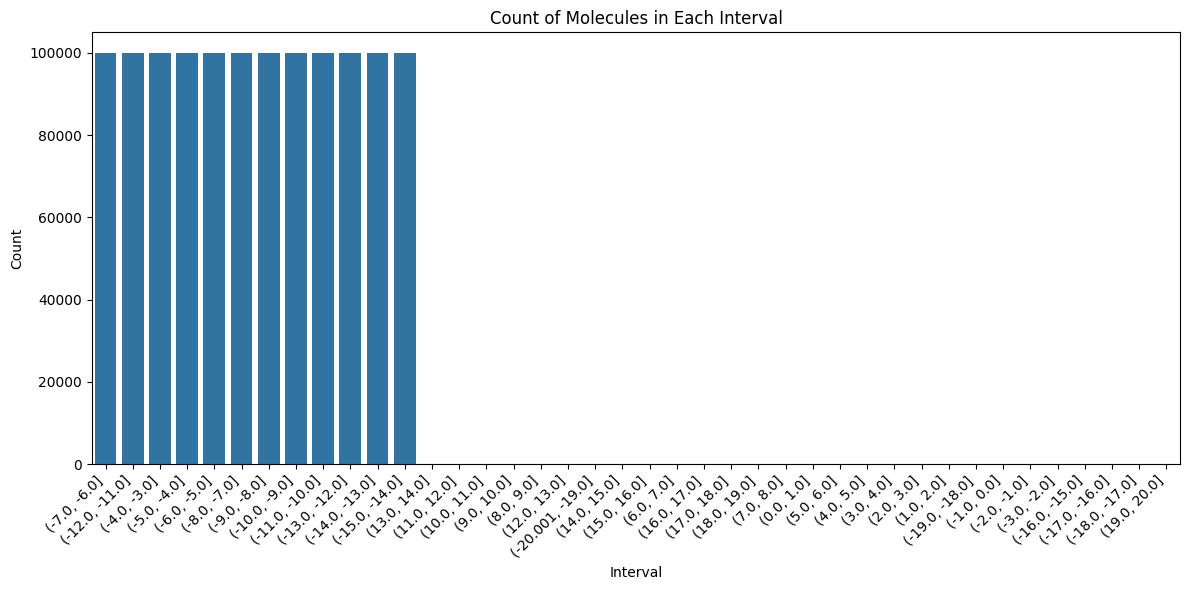

In [ ]:
plot_interval_counts(result_df)

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Dataframes/selected_molecules_n_100000.csv')
df.head(2)

,Interval,Receptor,Subset,r_i_docking_score,ZINC_ID,SMILES
0,"(-15.0, -14.0]",6IIU,validation,-14.881847,ZINC001129722346,C#C[C@@H](NC(=O)[C@@H]1CCCN(c2nc3ccccc3s2)C1)c...
1,"(-15.0, -14.0]",6IIU,validation,-14.196672,ZINC001600492567,Cc1ccc2c(CN3[C@@H]4C[C@H](C(=O)O)O[C@H]4CC[C@H...


In [ ]:
len(df)

1200000

In [ ]:
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values)

docking_stats = df['r_i_docking_score'].describe()
print("\nDocking Score Statistics:")
print(docking_stats)


Missing Values:
Interval             0
Receptor             0
Subset               0
r_i_docking_score    0
ZINC_ID              0
SMILES               0
dtype: int64

Docking Score Statistics:
count    1.200000e+06
mean    -9.006197e+00
std      3.405884e+00
min     -1.499999e+01
25%     -1.199999e+01
50%     -9.000001e+00
75%     -6.000018e+00
max     -3.000019e+00
Name: r_i_docking_score, dtype: float64


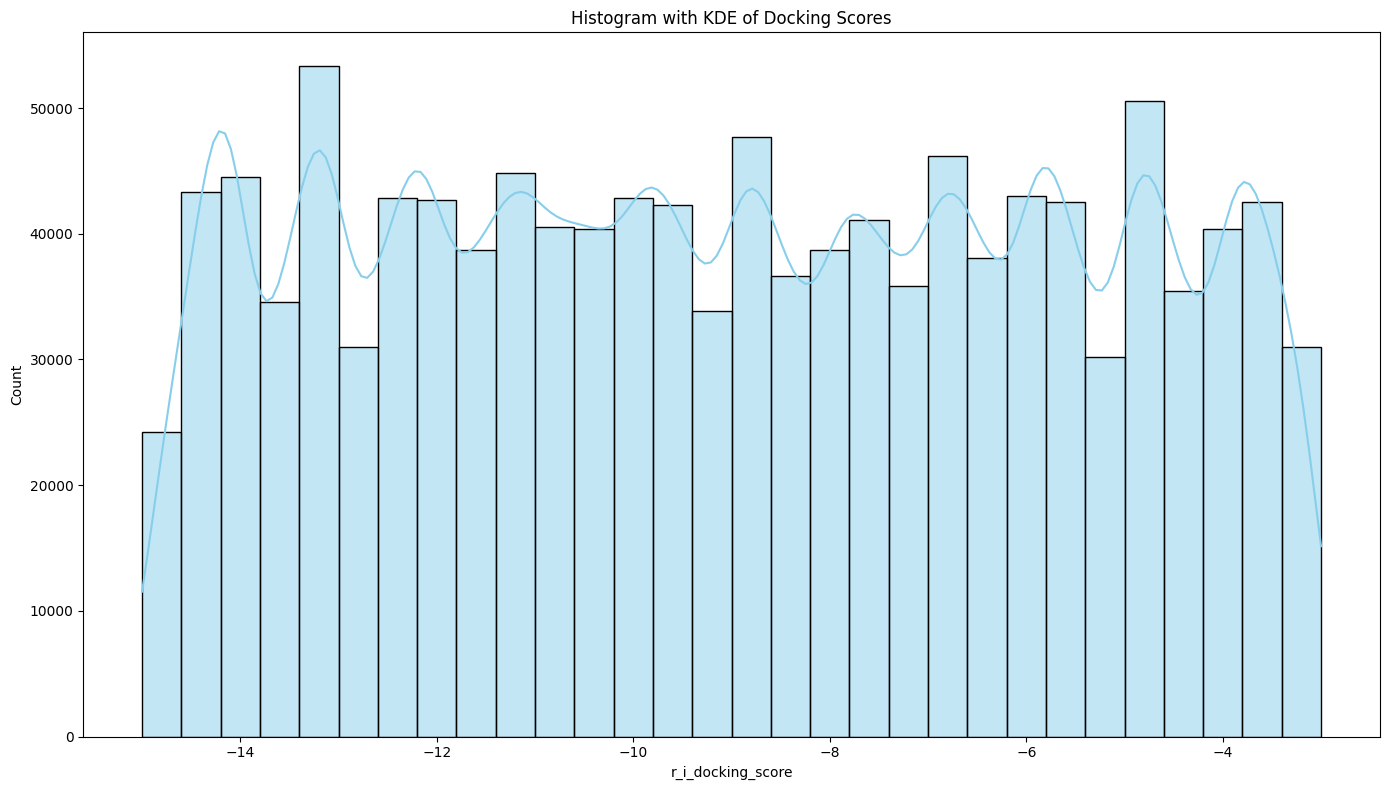

In [ ]:
plt.figure(figsize=(14, 8))

sns.histplot(df['r_i_docking_score'], bins=30, kde=True, color='skyblue')
plt.title('Histogram with KDE of Docking Scores')

plt.tight_layout()
plt.show()

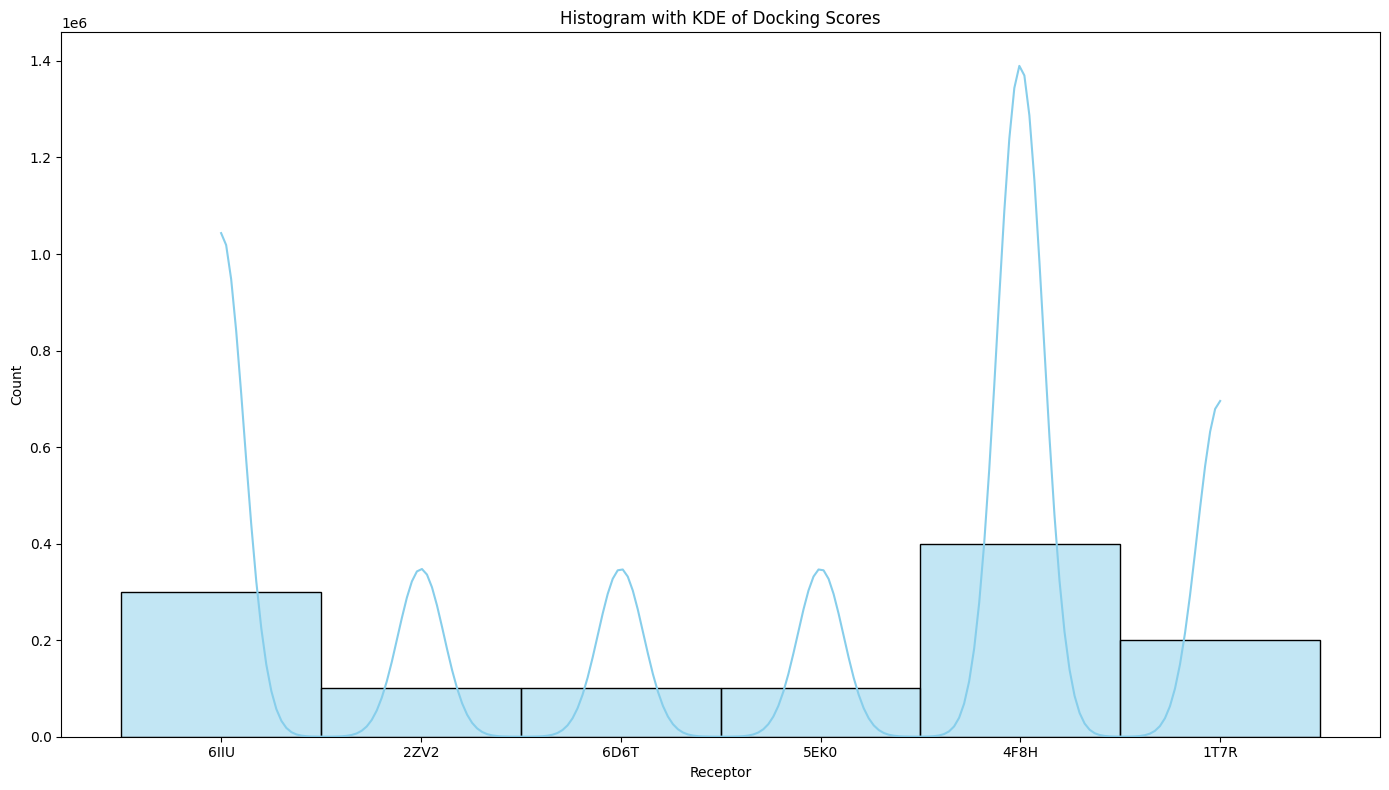

In [ ]:
plt.figure(figsize=(14, 8))

sns.histplot(df['Receptor'], bins=30, kde=True, color='skyblue')
plt.title('Histogram with KDE of Docking Scores')

plt.tight_layout()
plt.show()

In [ ]:
column_mapping = {
    'Interval': 'interval',
    'Receptor': 'pdb_id',
    'Subset': 'subset',
    'r_i_docking_score': 'docking_score',
    'ZINC_ID': 'zinc_id',
    'SMILES': 'smiles',
}
df.rename(columns=column_mapping, inplace=True)
df.head(2)

,interval,pdb_id,subset,docking_score,zinc_id,smiles
0,"(-15.0, -14.0]",6IIU,validation,-14.881847,ZINC001129722346,C#C[C@@H](NC(=O)[C@@H]1CCCN(c2nc3ccccc3s2)C1)c...
1,"(-15.0, -14.0]",6IIU,validation,-14.196672,ZINC001600492567,Cc1ccc2c(CN3[C@@H]4C[C@H](C(=O)O)O[C@H]4CC[C@H...


In [ ]:
len(df)

1200000

In [ ]:
desired_order = ['interval', 'subset', 'docking_score', 'pdb_id', 'zinc_id', 'smiles']
df = df[desired_order]
df.head(2)

,interval,subset,docking_score,pdb_id,zinc_id,smiles
0,"(-15.0, -14.0]",validation,-14.881847,6IIU,ZINC001129722346,C#C[C@@H](NC(=O)[C@@H]1CCCN(c2nc3ccccc3s2)C1)c...
1,"(-15.0, -14.0]",validation,-14.196672,6IIU,ZINC001600492567,Cc1ccc2c(CN3[C@@H]4C[C@H](C(=O)O)O[C@H]4CC[C@H...


In [ ]:
len(df)

1200000

In [ ]:
df.to_csv('/content/drive/MyDrive/Dataframes/df_balanced.csv')